From MNIST Fashion data take 100 data points belonging to classes Sneaker, Pullover and
Ankle boot.

(i) Project these data points on a 2D plane using data reduction techniques PCA, T-SNE and
MDA.

(ii) Take 50 data points belonging to classes Sneaker, Pullover and Ankle boot from the test data
set and compare the performance of these techniques(PCA, T-SNE, MDA) in terms of accuracy.

In [258]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as MDA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score as acsc
import tensorflow as tf
import numpy as np

In [259]:
mnist = tf.keras.datasets.fashion_mnist
# loading data
(x, y ) , (xtest, ytest) = mnist.load_data() 
print(x.shape)

(60000, 28, 28)


In [260]:
# getting 100 data (https://keras.io/api/datasets/fashion_mnist/)
#  pullover has label 2
pullover = np.where(y == 2)[0][:100] 
#  sneaker has label 7
sneaker = np.where(y == 7)[0][:100]
#  ankel boot has label 9
ankelboot = np.where(y == 9)[0][:100]
index = np.append(pullover, sneaker)
index = np.append(index, ankelboot)

new_x = x[index]
new_y = y[index]
print(new_x.shape)

(300, 28, 28)


In [261]:
pca_x = PCA(2).fit_transform(new_x.reshape(300,784))

In [262]:
def plot(x, y):
  plt.figure(2, figsize = (6,5))
  plt.scatter(x[:,0],x[:,1],c = y,edgecolors='#000000')

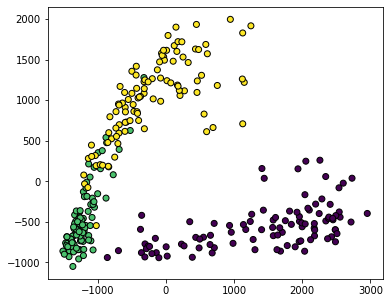

In [263]:
plot(pca_x, new_y)

(300, 2)


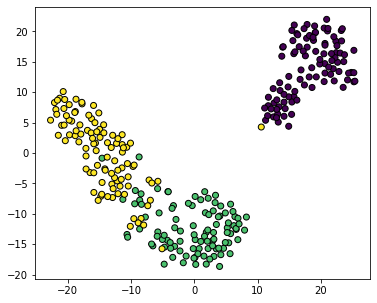

In [264]:
tsne_x = TSNE(2).fit_transform(new_x.reshape(300,784))
print(tsne_x.shape)
plot(tsne_x,new_y)

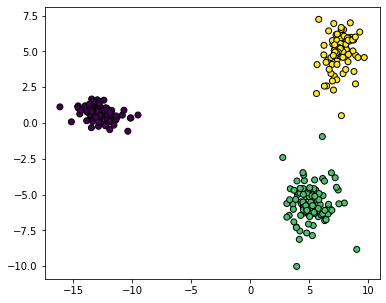

In [265]:
mda_x = MDA(n_components = 2).fit_transform(new_x.reshape(300,784), new_y)
plot(mda_x, new_y)

Now for training and testing


In [266]:
pullover = np.where(y==2)[0][:50] # half for training
sneaker = np.where(y==7)[0][:50]
ankelboot = np.where(y==9)[0][:50]
index = np.append(pullover, sneaker)
index = np.append(index, ankelboot)
new_x = x[index]
new_y = y[index]
# print(index)

In [267]:
pullover = np.where(y==2)[0][50:100] # half for testing
sneaker = np.where(y==7)[0][50:100]
ankelboot = np.where(y==9)[0][50:100]
index = np.append(pullover, sneaker)
index = np.append(index, ankelboot)
xtest = x[index]
ytest = y[index]

In [268]:
clf = PCA(2);
pca_x = clf.fit_transform(new_x.reshape(150,784))
test_pca_x = clf.transform(xtest.reshape(150,784))
clf = LogisticRegression().fit(pca_x, new_y)
acsc(clf.predict(test_pca_x), ytest)
# accuracy

0.9466666666666667

In [269]:
clf = TSNE(2);
tsne_x = clf.fit_transform(new_x.reshape(150,784))
clf = LogisticRegression().fit(tsne_x, new_y)
acsc(clf.predict(tsne_x), new_y)
# accuracy

0.94

In [270]:
clf = MDA(n_components=2)
mda_x = clf.fit_transform(new_x.reshape(150, 784), new_y)
test_mda_x = clf.transform(xtest.reshape(150, 784))
clf = LogisticRegression().fit(mda_x, new_y)
acsc(clf.predict(test_mda_x), ytest)
# accuracy

0.92